<a href="https://colab.research.google.com/github/webdeeva/thinkful/blob/master/email_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study - Email Marketing

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
%matplotlib inline
import statsmodels.stats.proportion as proportion
from statsmodels.stats.weightstats import CompareMeans

In [0]:
ab_results = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv')

In [0]:
ab_results.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [0]:
# Separate into control and treatment samples
control = ab_results.loc[ab_results.group == 'control',:]
treatment = ab_results.loc[ab_results.group == 'treatment',:]

In [0]:
control.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [0]:
treatment['timestamp']

2         2017-01-11 16:55:06.154213
3         2017-01-08 18:28:03.143765
6         2017-01-19 03:26:46.940749
8         2017-01-04 17:58:08.979471
9         2017-01-15 18:11:06.610965
                     ...            
290569    2017-01-03 19:41:51.902148
290572    2017-01-07 20:38:26.346410
290575    2017-01-02 19:20:05.460595
290579    2017-01-04 03:36:46.071379
290584    2017-01-16 12:40:24.467417
Name: timestamp, Length: 145311, dtype: object

In [0]:
#Check for adequate sample sizes
print('control sample size', len(control))
print('treatment sample size', len(treatment))

control sample size 145274
treatment sample size 145311


In [0]:
# Make timestamps dates
control['date'] = pd.DatetimeIndex(control['timestamp']).date
treatment['date'] = pd.DatetimeIndex(treatment['timestamp']).date

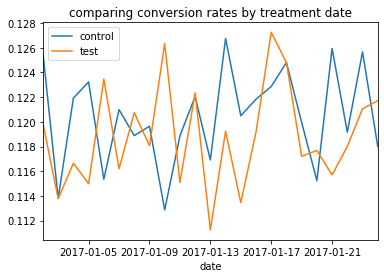

In [0]:
# Plot the conversion rate over time
fig = control.loc[:, ['date', 'converted']].groupby('date').mean().plot()
treatment.loc[:,['date', 'converted']].groupby('date').mean().plot(ax=fig)
plt.legend(['control', 'test'])
plt.title('comparing conversion rates by treatment date')
plt.show()

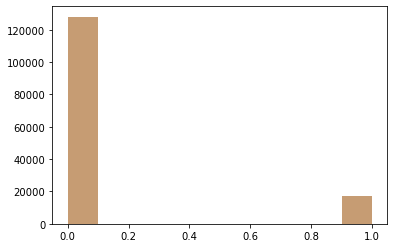

They are literally nearly identical. They are on top of each other


In [0]:
# Observe distributions
plt.hist(control.converted, alpha=.5)
plt.hist(treatment.converted, alpha=.5)
plt.show()
print('They are literally nearly identical. They are on top of each other')

In [0]:
# Perform a ttest between means
ttest_results = stats.ttest_ind(control.converted, treatment.converted)
print(ttest_results)
print('with a t-statistic {:.2f} below 1.96 AND a p-value {:.2f} above .05, these results do not appear in any way significant statistically.'.format(ttest_results.statistic, ttest_results.pvalue))

Ttest_indResult(statistic=1.3116069027036805, pvalue=0.18965383906859376)
with a t-statistic 1.31 below 1.96 AND a p-value 0.19 above .05, these results do not appear in any way significant statistically.


In [0]:
# Calculate confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = np.sqrt((sample_1_var/sample_1_n) + 
                                 (sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return ('The difference in means at the 95% confidence interval ' + 
            '(two-tail) is between {:.2f} and {:.2f}.'.format(ci_lower, ci_upper))

get_95_ci(control['converted'], treatment['converted'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.00 and 0.00.'

In [0]:
# Perform a proportions z_test
table = pd.crosstab(ab_results.group, ab_results.converted, margins=True)
print(table)

count = table.loc[['control', 'treatment'], 1]
nobs = table.loc[['control', 'treatment'], 'All']

zstat, p = proportion.proportions_ztest(count=count, nobs=nobs)
zstat, p

converted       0      1     All
group                           
control    127785  17489  145274
treatment  128047  17264  145311
All        255832  34753  290585


(1.3116075339133115, 0.18965258971881804)

In [0]:
# Perform a proportions chisquare test
chi2stat, p, _ = proportion.proportions_chisquare(count=count, nobs=nobs)
chi2stat, p

(1.720314323018192, 0.1896525897188101)

In [0]:
# Still nothing in any way significant. There is no statistically justifiable way to reject the null hypothesis that the means are the same between control and treatment groups